In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,12

In [3]:
class Ising:
    def __init__(self, width, height, n_th = 1):
        self.width, self.height = width, height
        # {-1, +1}の乱数生成
        self.spins = np.random.choice([-1,1], width * height).astype("int").reshape(width, height).tolist()
        
        # 隣接リスト作成
        self.adjacencyList = self._makeAdjacencyList(n_th)
        
        self.temperature = 1. # 温度
        self.weight = np.random.uniform(-1, 1, n_th).tolist()  # n-th neighbor相互作用
        
    def _makeAdjacencyList(self, n_th):
        '''
        @param n_th n次近接までのノードを見る.
        '''
        ad_list = np.zeros(self.width * self.height).reshape(self.width, self.height)
        
        '''
        TODO: 5重ループの闇
        '''
        for x in range(self.width):
            for y in range(self.height):
                ad_list[x][y] = []
                for n in range(1, n_th + 1):
                    for x_pad in range(-n, n + 1):
                        for y_pad in range(-n, n + 1):
                            """
                            if not n-th neighbor, continue
                            """
                            if  ((np.abs(x_pad) + np.abs(y_pad)) != n):
                                continue

                            if (0 <= (x + x_pad) < self.width) and (y <= (y + y_pad) < self.height):
                                lst = [x + x_pad, y + y_pad, n]
                                ad_list[x][y].append(lst)                
                
        return ad_list
                
    def gibbsSampling(self, x, y):
        c = 0
        for l in self.adjacencyList[x][y]:
            x, y, n = l
            c += self.weight[n-1] * self.spins[x][y]
        c /= self.temperature
        return -1 if np.random.uniform() < np.exp(-c) / (2 * np.cosh(c)) else +1
        

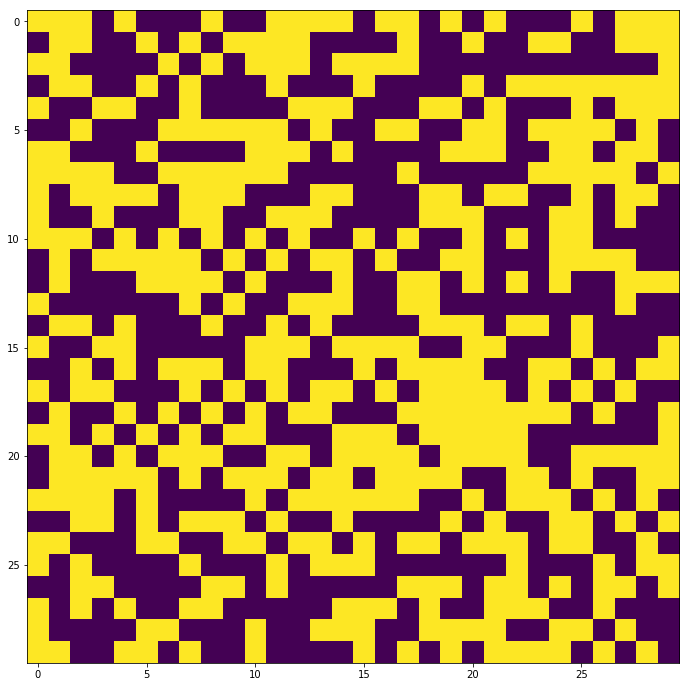

In [6]:
a = Ising(30, 30, n_th = 8)
a.weight= np.random.uniform(-1, 1, 8).tolist() # 相互作用
a.temperature = 8

fig = plt.figure()
ims = []

for i in range(50):
    for j in range(30):
        x, y = np.random.randint(0, a.width), np.random.randint(0, a.height)
        a.spins[x][y] = a.gibbsSampling(x, y)
        a.temperature *= 0.99998
    im = plt.imshow(a.spins, animated=True)
    ims.append([im])
    
for i in range(250):
    for j in range(30):
        x, y = np.random.randint(0, a.width), np.random.randint(0, a.height)
        a.spins[x][y] = a.gibbsSampling(x, y)
    im = plt.imshow(a.spins, animated=True)
    ims.append([im])


ani = animation.ArtistAnimation(fig, ims, interval=20, blit=True)
ani.save('anim.mp4', writer="ffmpeg")